In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("seaborn")

In [ ]:
from google.colab import files 
 
uploaded = files.upload()

Saving NIFTY 50.csv to NIFTY 50 (4).csv


In [ ]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['NIFTY 50.csv']))
print(df)
data = pd.read_csv("NIFTY 50.csv", parse_dates = ["Date"], index_col = "Date")
data.info()

            Date      Open      High       Low     Close     Volume  \
0     2000-01-03   1482.15   1592.90   1482.15   1592.20   25358322   
1     2000-01-04   1594.40   1641.95   1594.40   1638.70   38787872   
2     2000-01-05   1634.55   1635.50   1555.05   1595.80   62153431   
3     2000-01-06   1595.80   1639.00   1595.80   1617.60   51272875   
4     2000-01-07   1616.60   1628.25   1597.20   1613.30   54315945   
...          ...       ...       ...       ...       ...        ...   
5348  2021-07-01  15755.05  15755.55  15667.05  15680.00  224921644   
5349  2021-07-02  15705.85  15738.35  15635.95  15722.20  254808999   
5350  2021-07-05  15793.40  15845.95  15762.05  15834.35  207032153   
5351  2021-07-06  15813.75  15914.20  15801.00  15818.25  391410742   
5352  2021-07-07  15819.60  15893.55  15779.70  15879.65  329308646   

          Turnover    P/E   P/B  Div Yield  
0     8.841500e+09  25.91  4.63       0.95  
1     1.973690e+10  26.67  4.76       0.92  
2     3.0847

In [ ]:
df = pd.DataFrame(data, columns=['Close'])
#df = df.reset_index()
df["Return"] = df.Close.pct_change()
df.dropna(inplace = True)
df

,Close,Return
Date,,
2000-01-04,1638.70,0.029205
2000-01-05,1595.80,-0.026179
2000-01-06,1617.60,0.013661
2000-01-07,1613.30,-0.002658
2000-01-10,1632.95,0.012180
...,...,...
2021-07-01,15680.00,-0.002640
2021-07-02,15722.20,0.002691
2021-07-05,15834.35,0.007133


In [ ]:
df.Close.rolling(window = 50).mean()

Date
2000-01-04          NaN
2000-01-05          NaN
2000-01-06          NaN
2000-01-07          NaN
2000-01-10          NaN
                ...    
2021-07-01    15275.350
2021-07-02    15301.671
2021-07-05    15331.531
2021-07-06    15358.196
2021-07-07    15382.728
Name: Close, Length: 5352, dtype: float64

In [ ]:
df["SMA50"] = df.Close.rolling(window = 50).mean()

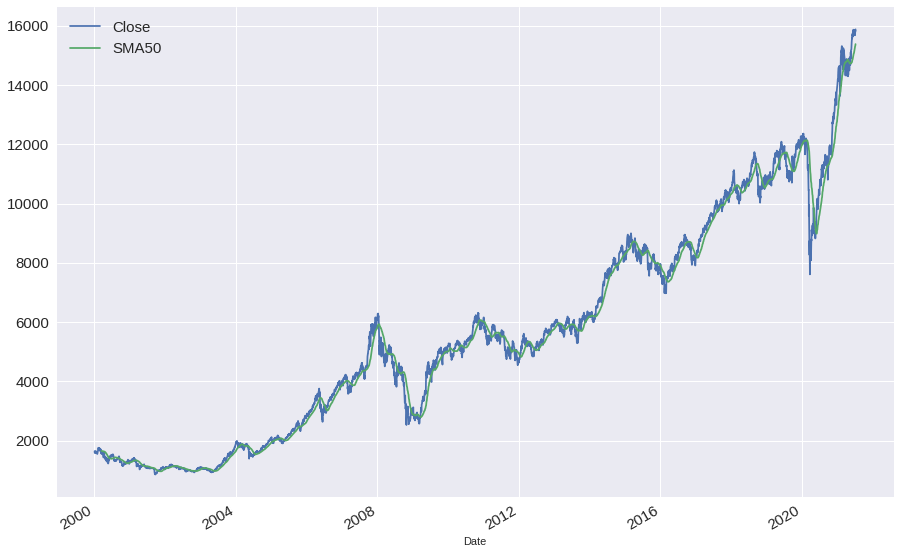

In [ ]:
df[["Close", "SMA50"]].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [ ]:
df["SMA200"] = df.Close.rolling(window = 200).mean()

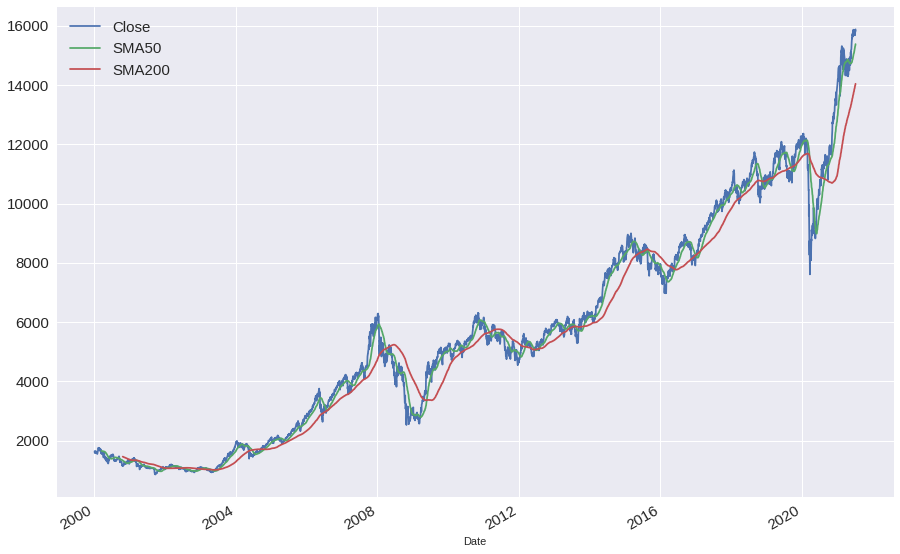

In [ ]:
df[["Close", "SMA50", "SMA200"]].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [ ]:
df.dropna(inplace = True)
df["Position"] = np.sign(df.SMA50.sub(df.SMA200))
df

,Close,Return,SMA50,SMA200,Position
Date,,,,,
2000-10-20,1172.00,0.005017,1324.791,1457.52525,-1.0
2000-10-23,1143.95,-0.023933,1320.771,1455.05150,-1.0
2000-10-24,1152.45,0.007430,1317.260,1452.83475,-1.0
2000-10-25,1183.90,0.027290,1314.723,1450.66625,-1.0
2000-10-26,1186.30,0.002027,1312.091,1448.53125,-1.0
...,...,...,...,...,...
2021-07-01,15680.00,-0.002640,15275.350,13957.00950,1.0
2021-07-02,15722.20,0.002691,15301.671,13978.29825,1.0
2021-07-05,15834.35,0.007133,15331.531,14000.26975,1.0


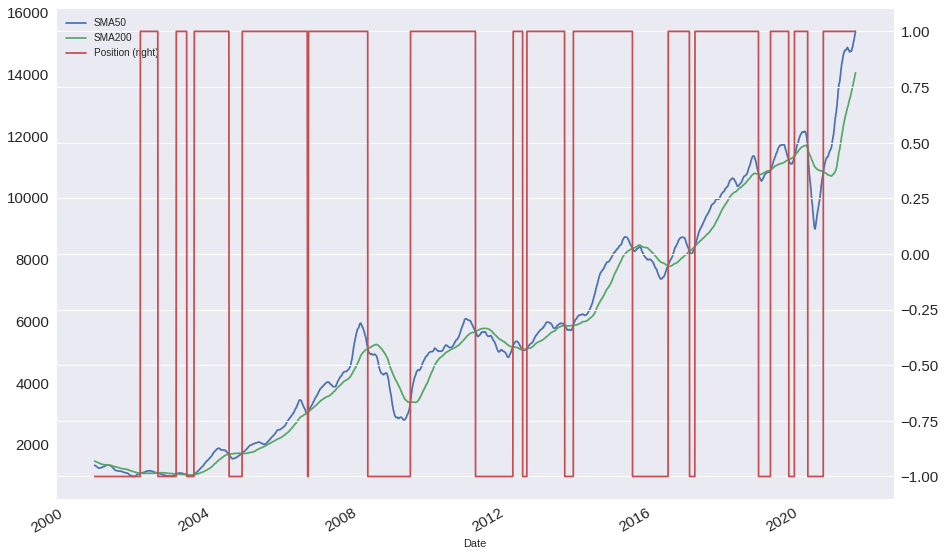

In [ ]:
df[["SMA50", "SMA200", "Position"]].plot(figsize = (15,10), secondary_y = "Position", fontsize = 15)
plt.show()

In [ ]:
df["Strategy_Return"] = df["Position"].shift() * df["Return"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, test_size=0.10)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)

In [ ]:
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [ ]:
poly_features = poly.fit_transform(X_train.reshape(-1,1))

In [ ]:
poly_features = poly.fit_transform(X_train.reshape(-1,1))

In [ ]:
from pandas.core.common import random_state
model = LinearRegression()
svr_poly = SVR(kernel="rbf", C=100, gamma="auto")
#model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
# Fit linear model using the train data set
model.fit(poly_features, y_train)
fitting = model.predict(poly_features)
#model_rf.fit(X_train, y_train)
fitting

array([ 6276.44428554,  2817.93398205,  8169.80028226, ...,
       12618.71853963,  1556.05126378, 11697.25200919])

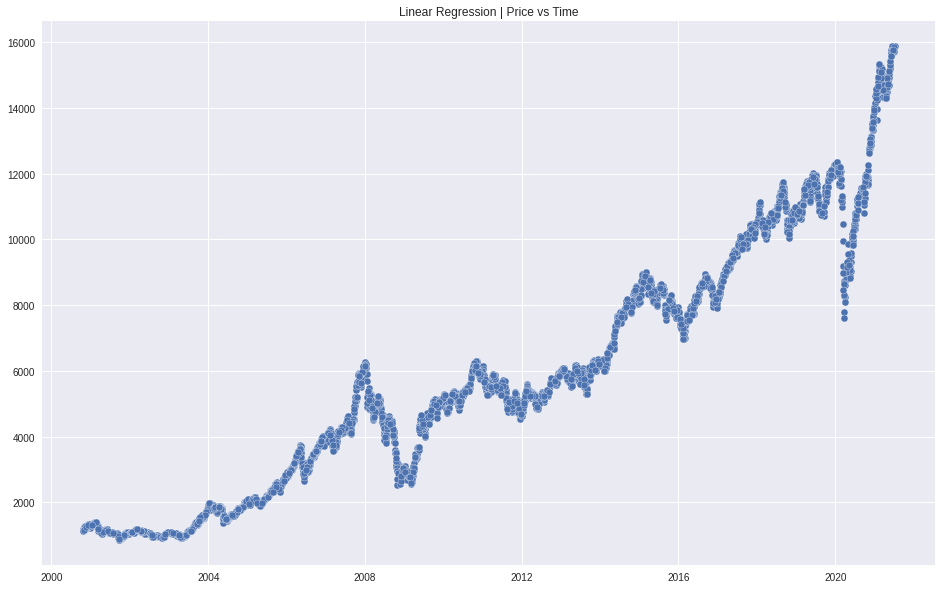

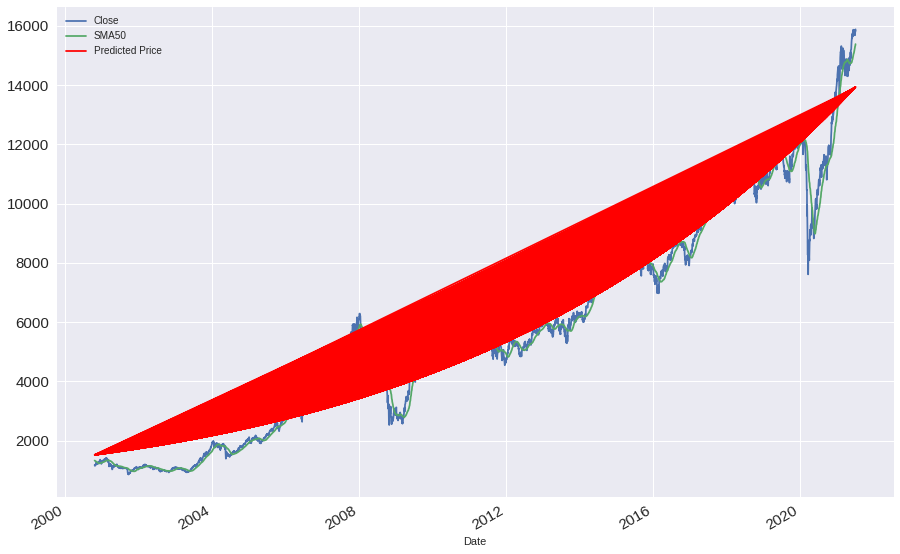

In [ ]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
df[["Close", "SMA50"]].plot(figsize = (15,10), fontsize = 15)
plt.plot(X_train, fitting, color='r', label='Predicted Price')
plt.legend()
plt.show()